In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [130]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [212]:
class Net:
    def __init__(self):
        self.layers = []
        
    def add_layer(self, n_inputs, n_outputs, activation):
        if activation == 'ReLU':
            activation = self.ReLU
        elif activation == 'sigmoid':
            activation = self.sigmoid
        elif activation == 'softmax':
            activation = self.softmax
        else:
            raise Exception(f"{activation} is not a valid activation function")
                            
        if len(self.layers) > 0:
            if n_inputs == self.layers[-1].n_outputs:
                layer = Layer_Dense(n_inputs, n_outputs, activation)
            else:
                raise Exception('Invalid layer dims')
        else:
            layer = Layer_Dense(n_inputs, n_outputs, activation)
            
        self.layers.append(layer)

    
    def ReLU(self, Z, derive = False):
        if not derive:
            return np.maximum(Z, 0)
        else:
            return Z > 0
        
    def sigmoid(self, Z, derive = False):
        if not derive:
            return 1/(1 + np.exp(-Z))
        else:
            y = 1/(1 + np.exp(-Z))
            yp = y * (1.0 - y)
            return yp
        
    
    def softmax(self, Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A
    
    def one_hot(self, Y, n_classes):
        one_hot_Y = np.zeros((Y.size, n_classes))
        one_hot_Y[np.arange(Y.size), Y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    def update_params(self, layer, dW, db, learning_rate):
        layer.W -= learning_rate * dW
        layer.b -= learning_rate * db
        
    def forward_propagate(self, inputs):
        for i, layer in enumerate(self.layers):    
            layer.inputs = inputs
            Z = layer.W.dot(inputs) + layer.b
            A = layer.activation(Z)
            layer.Z = Z
            layer.A = A
            inputs = A
        return A
    
    def backward_propagate(self, outputs, Y, learning_rate, n_classes):
        one_hot_y = self.one_hot(Y, n_classes)
        
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                dZ = outputs - one_hot_y
            else:
                dZ = self.layers[i+1].W.T.dot(dZ) * layer.activation(layer.Z, derive = True)
            dW = 1/m * dZ.dot(layer.inputs.T)
            db = 1/m * np.sum(dZ)
            self.update_params(layer, dW, db, learning_rate)
    
    def get_predictions(self, prediction):
        return np.argmax(prediction, 0)
    
    def score(self, X, Y):
        predictions = self.get_predictions(self.predict(X))
        return np.sum(predictions == Y) / Y.size
                
    def fit_minibatch(self, X, Y, n_classes, batchsize, epochs = 500, learning_rate = 1):
        for epoch in range(epochs):
            for start_idx in range(0, X.T.shape[0], batchsize):
                end_idx = min(start_idx + batchsize, X.T.shape[0])
                excerpt = slice(start_idx, end_idx)

                inputs = X.T[excerpt].T
                targets = Y.T[excerpt].T
            
                predictions = self.forward_propagate(inputs)
                loss = self.backward_propagate(predictions, targets, learning_rate, n_classes)

            print("Iteration: ", epoch)
            print('Accuracy: ', self.score(X,Y))
    
    def predict(self, X): 
        return self.forward_propagate(X)

        
class Layer_Dense:
    def __init__(self, n_inputs, n_outputs, activation):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = np.random.rand(n_outputs, n_inputs) - 0.5
        self.b =  np.random.rand(n_outputs, 1) - 0.5
        
        #self.W = self.W.astype(np.float128)
        #self.b = self.b.astype(np.float128)
        
        self.activation = activation
        
        self.inputs = None
        self.Z = None
        self.A = None


In [215]:
net = Net()

net.add_layer(784, 10, 'sigmoid')
net.add_layer(10, 10, 'softmax')
net.fit_minibatch(X_train, Y_train, n_classes = 10, batchsize = 32, epochs = 100, learning_rate = 1)

print('-'*20)


Iteration:  0
Accuracy:  0.1524390243902439
Iteration:  1
Accuracy:  0.18460975609756097
Iteration:  2
Accuracy:  0.21009756097560975
Iteration:  3
Accuracy:  0.23217073170731709
Iteration:  4
Accuracy:  0.2529512195121951
Iteration:  5
Accuracy:  0.2751707317073171
Iteration:  6
Accuracy:  0.29897560975609755
Iteration:  7
Accuracy:  0.32502439024390245
Iteration:  8
Accuracy:  0.3510731707317073
Iteration:  9
Accuracy:  0.3780731707317073
Iteration:  10
Accuracy:  0.4045609756097561
Iteration:  11
Accuracy:  0.42853658536585365
Iteration:  12
Accuracy:  0.45121951219512196
Iteration:  13
Accuracy:  0.47136585365853656
Iteration:  14
Accuracy:  0.48990243902439023
Iteration:  15
Accuracy:  0.5077560975609756
Iteration:  16
Accuracy:  0.5249268292682927
Iteration:  17
Accuracy:  0.5403170731707317
Iteration:  18
Accuracy:  0.5540731707317074
Iteration:  19
Accuracy:  0.5668536585365853
Iteration:  20
Accuracy:  0.5783414634146341
Iteration:  21
Accuracy:  0.5892439024390244
Iteration: 

In [147]:
net = Net()

net.add_layer(784, 10, 'sigmoid')
net.add_layer(10, 10, 'softmax')
net.fit(X_train, Y_train, 10, 1)

(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)
(784, 41000) (41000,)


In [10]:
net.score(X_dev, Y_dev)

0.864

In [11]:
def test_prediction(net, index):
    current_image = X_train[:, index, None]
    prediction = net.predict(X_train[:, index, None])
    prediction = net.get_predictions(prediction)
    label = Y_train[index]
    print('Prediction: ', prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [0]
Label:  0


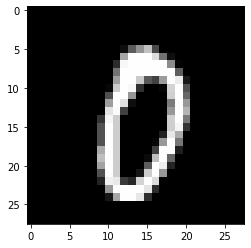

Prediction:  [6]
Label:  6


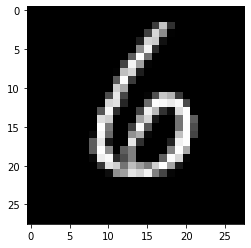

Prediction:  [1]
Label:  1


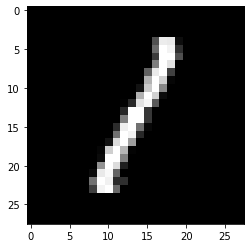

Prediction:  [8]
Label:  8


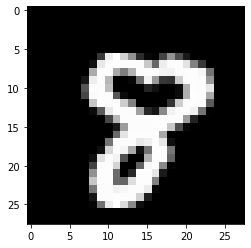

Prediction:  [6]
Label:  6


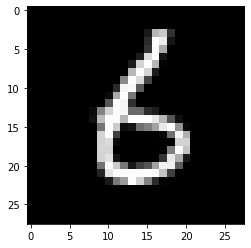

Prediction:  [8]
Label:  8


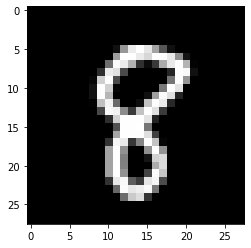

Prediction:  [4]
Label:  4


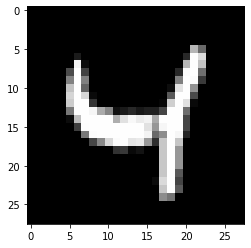

Prediction:  [1]
Label:  1


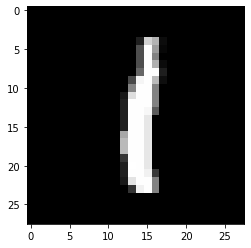

Prediction:  [8]
Label:  8


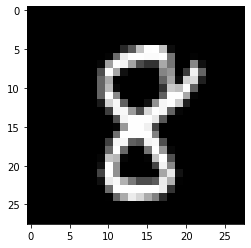

Prediction:  [9]
Label:  9


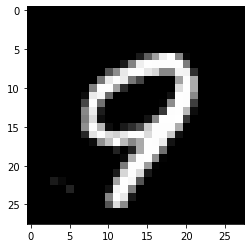

Prediction:  [0]
Label:  0


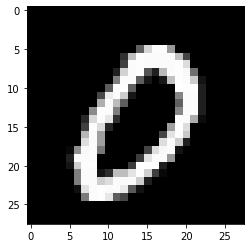

Prediction:  [3]
Label:  3


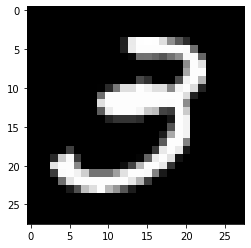

Prediction:  [5]
Label:  5


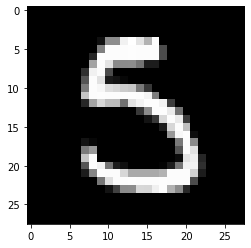

Prediction:  [8]
Label:  8


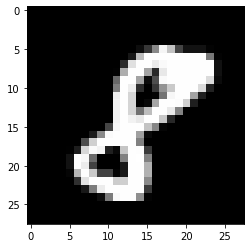

Prediction:  [7]
Label:  7


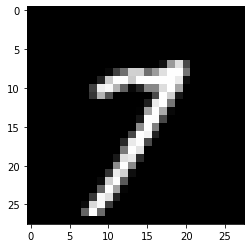

Prediction:  [5]
Label:  3


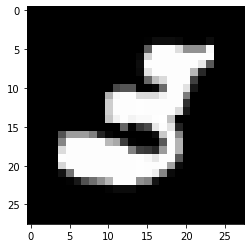

Prediction:  [4]
Label:  4


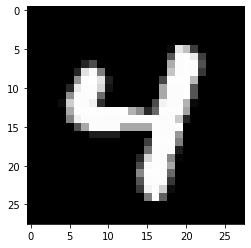

Prediction:  [0]
Label:  0


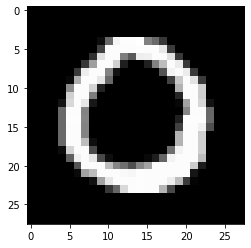

Prediction:  [0]
Label:  0


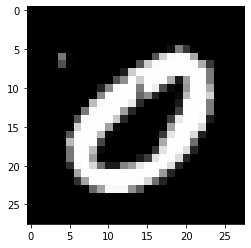

Prediction:  [5]
Label:  5


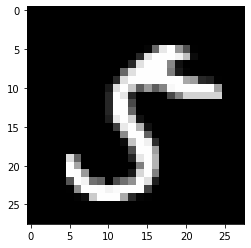

In [12]:
for i in range(20):
    test_prediction(net, i)